In [1]:
# 2. Import required libraries
import seaborn as sns
import pandas as pd
import numpy as np
import pprint

In [2]:
# 3 Read your cleaned csv which you did in phase 1
data = pd.read_csv('./clean_data.csv')

In [3]:
# 4. Shape the data

# I don't know what "shaping data" means, so I did this
df = pd.DataFrame(data)
df.shape

(16448, 9)

In [4]:
# 5. Show first five record

# using data instead of df because it's already there
pprint.pprint(data[0:5])

                       Name Platform  Year_of_Release         Genre  NA_Sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     28.96      3.77         8.45         82.53  
1      3.58      6.81         0.77         40.24  
2     12.76      3.79         3.29         35.52  
3     10.93      3.28         2.95         32.77  
4      8.89     10.22         1.00         31.37  


In [5]:
# 6 Show all columns of the dataframe
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
# 7 Show last 5 five rows
pprint.pprint(data[len(data)-1:len(data)-6: -1])

                                Name Platform  Year_of_Release       Genre  \
16447            Winning Post 8 2016      PSV           2016.0  Simulation   
16446               Spirits & Spells      GBA           2003.0    Platform   
16445        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16444               LMA Manager 2007     X360           2006.0      Sports   
16443  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16447      0.00      0.00      0.01          0.0          0.01  
16446      0.01      0.00      0.00          0.0          0.01  
16445      0.00      0.00      0.01          0.0          0.01  
16444      0.00      0.01      0.00          0.0          0.01  
16443      0.00      0.00      0.01          0.0          0.01  


In [7]:
# 8 Describe the data.

# not sure if it's asking me to describe in english or use this function
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000
mean,2006.488996,0.263965,0.145895,0.078472,0.047583,0.53617
std,5.877470,0.818286,0.506660,0.311064,0.187984,1.55846
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.01000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.06000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.17000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.47000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.53000


<AxesSubplot:xlabel='Year_of_Release'>

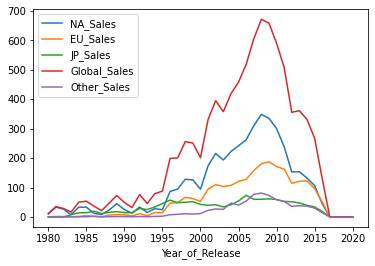

In [8]:
# 9. Group the sales data of each region on Year_of_Release and plot the same 
# (It should show which region sales was at peak on which year of release)

# Each line describes the trend in sales for each region with Global being the largest
df.groupby("Year_of_Release")[["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales", "Other_Sales"]] \
    .agg("sum") \
    .plot()

<AxesSubplot:xlabel='Genre'>

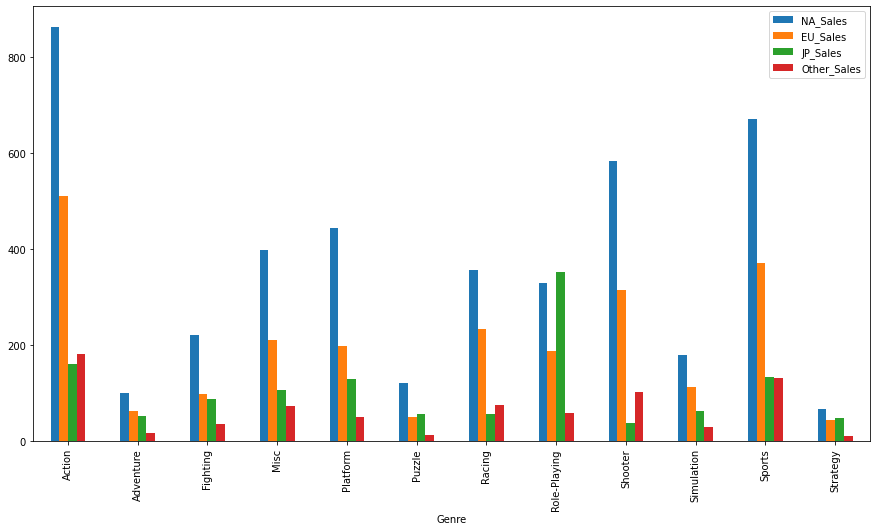

In [9]:
# 10. Group North American, Japan, European & Other region sales data as per Genre and
# plot it (It should show highest of region according to game category , ex- NA_Sales is
# highest in Adventure category , plot kind should be bar

# The sales of each region is grouped together by Genre
df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]] \
    .agg("sum") \
    .plot(kind="bar", figsize=(15, 8))

<AxesSubplot:xlabel='Platform'>

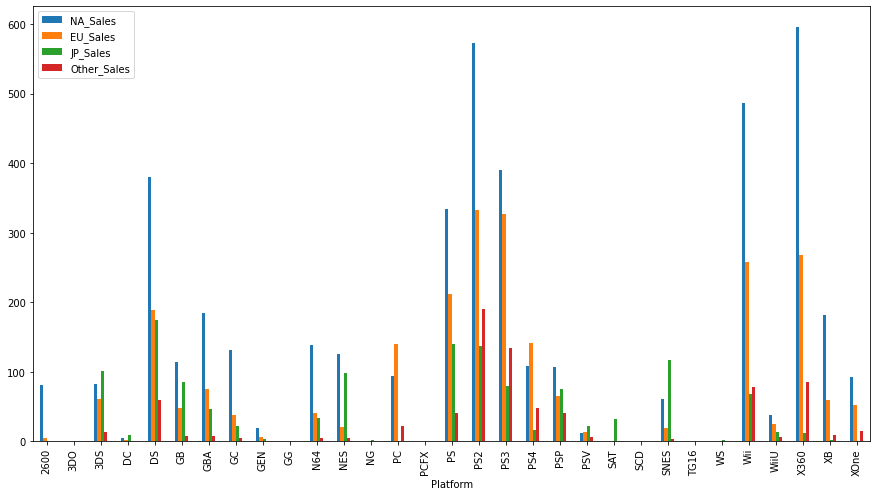

In [10]:
# 11 Group North American, Japan, European & Other region sales data as per Platform
# and plot it (Should show sales as per "Platform genre" , plot kind should be bar )

# The sales of each region is grouped together by Platform
df.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]] \
    .agg("sum") \
    .plot(kind="bar", figsize=(15, 8))

<AxesSubplot:xlabel='Platform'>

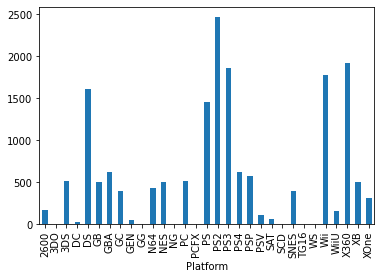

In [11]:
# Plot the Sales in all regions as per Platform , you need to create a boxplot for that
# which will show the distribution of sales as per platform

# This shows the total sales of every single platform
df.set_index(["Name", "Platform", "Year_of_Release", "Genre"]) \
    .stack() \
    .groupby("Platform") \
    .agg("sum").plot(kind="bar")

<AxesSubplot:xlabel='Genre', ylabel='count'>

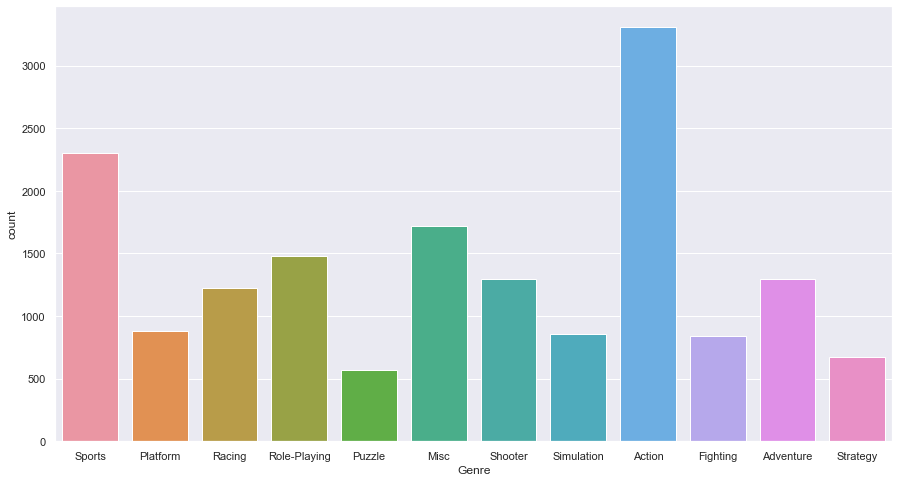

In [12]:
# 13. Find out which Genre games are sold in highest numbers (create a countplot of
# seaborn which could do that)

# This gets the charts the sales compared to genre
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(x="Genre", data=data)

<AxesSubplot:xlabel='Genre'>

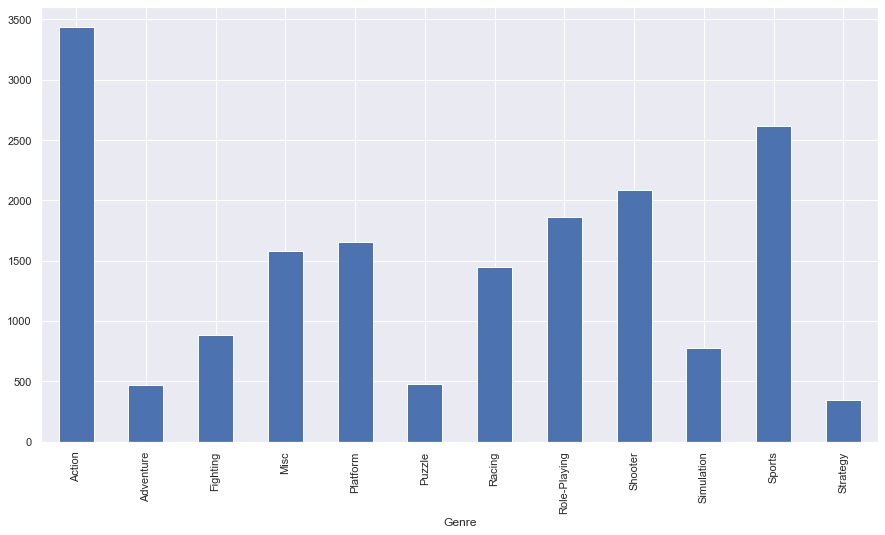

In [13]:
# For some reason, the total sales differs in seaborn and in panda's builtin plot, with "Adventure" being the most
# effected
df.set_index(["Name", "Platform", "Year_of_Release", "Genre"]) \
    .stack() \
    .groupby("Genre") \
    .agg("sum").plot(kind="bar")

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

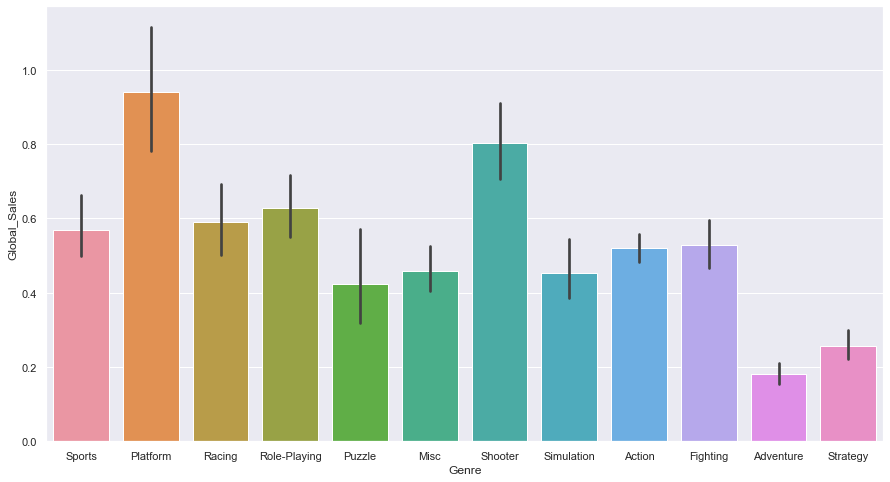

In [14]:
# 14. Try to find out global sales as per Genre ,(create a barplot of seaborn for that)
sns.barplot(x="Genre", y="Global_Sales", data=data)